**The Sparks Foundation - Data Science Internship Task 1**

**Predicting with the help of Simple Linear Regression**

**Author : - Shaunak Barve**

In [1]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split

In [2]:
# reading in the data and segregating into target and explanatory variables
data = pd.read_csv("Task1.csv")
y = data.Scores
x = data.Hours

In [3]:
print(data.isna().sum()) # checking for missing values 

Hours     0
Scores    0
dtype: int64


Text(0.5, 1.0, 'Distribution of number of hours')

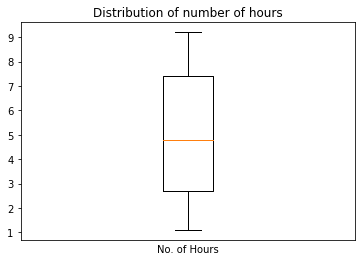

In [4]:
# looking at the distribution of number of hours
plt.boxplot(x)
plt.xticks(())
plt.xlabel("No. of Hours")
plt.title("Distribution of number of hours")


**We can observe that there are no missing values in our data and the distribution of the number of hours of study is slightly positively skewed with no outliers**

Text(0.5, 0, 'No. of Hours')

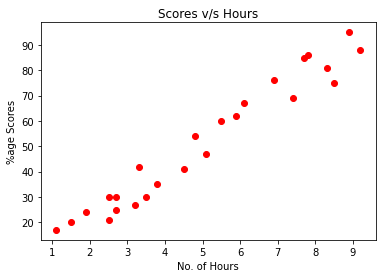

In [5]:
# Looking at the scatter plot of the data
plt.scatter(x,y,c = 'r')
plt.title("Scores v/s Hours")
plt.ylabel("%age Scores")
plt.xlabel("No. of Hours")

Looking at the above scatter plot of how the %age scores depend upon the number of hours a student studies, it's safe to say that the best supervised model that would fit the data is the linear regression model.


Before that, in order to test the performance of the model that we will fit, we will divide the data into train and test sets.

In [6]:
# splitting the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 123)

In [7]:
lin_reg = linear_model.LinearRegression() # linear regression model
lin_reg.fit(x_train.values.reshape(-1,1),y_train) # training the model
y_pred = lin_reg.predict(x_test.values.reshape(-1,1)) # predicting on the test data using the trained model

In [8]:
# printing out the results
print("The coefficient and the intercept of the trained model are", 
      round(lin_reg.coef_[0],4),"and",round(lin_reg.intercept_,4),"respectively.")
print("The adjusted R - squarred value of the model is",round(metrics.r2_score(y_test,y_pred),5)*100,"%.")

The coefficient and the intercept of the trained model are 9.6172 and 2.4486 respectively.
The adjusted R - squarred value of the model is 95.938 %.




*   The intercept **2.4486** tells us that if a student studies for 0 hours, the %age score that he or she will achieve is **2.4486**. The coefficient value **9.6172** tells us that for every on hour that the student studies, his or her %age score increases by **9.6172%** per hour.
*   The Coefficient of Determination of the fitted model is **95.938%**. This tells us that the number of hours a student studies, explains over **95.938%** variation in the %age of scores he or she achieves. This value also tells us that the model has fit the data really well.






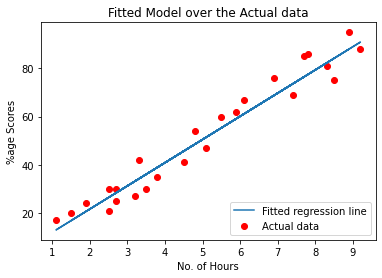

In [9]:
fitted_line = lin_reg.coef_ * x + lin_reg.intercept_ # computing the fitted line for the entire data

# plotting the fitted line over the actual score
plt.scatter(x,y,c = 'r', label = "Actual data")
plt.plot(x,fitted_line, label = "Fitted regression line")
plt.title("Fitted Model over the Actual data")
plt.ylabel("%age Scores")
plt.xlabel("No. of Hours")
plt.legend(loc = 4)

In [10]:
# calculating the predicted score of the given number of hours
pred_value = lin_reg.predict(pd.Series(9.25).values.reshape(-1,1))
print("The predicted score if a student studies for 9.25 hours/day will be",round(pred_value[0],2),"%.")

The predicted score if a student studies for 9.25 hours/day will be 91.41 %.


Thus,depending on our model, we can conclude that if a student studies for **9.25** hours/day, the score that he or she will acieve is **91.41%**.
